In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', None)
from sklearn import linear_model, model_selection
from sklearn import tree, ensemble, model_selection, metrics
from sklearn import linear_model

In [2]:
# importing the one-hot file 
variables = pd.read_csv('/Users/weijilim/Downloads/hh_final_one_hot_encoding.csv')
variables

,Unnamed: 0,HOUSEID,VEHOWN,HHFAMINC,WALK,TAXI,BUS,TRAIN,PRICE,WALK2SAVE,BIKE2SAVE,PTRANS,HHRELATD,CNTTDHH,LIF_CYC,URBAN,URBANSIZE,HIGH_EDUC,HOMEOWN,WEBUSE17,WRKCOUNT_ratio,HHSIZE_cleaned,FT_ratio,AVG_WORK_DIST,one_job,flexible_work,DRVRCNTPROP_binned,HHFAMINC_1.0,HHFAMINC_2.0,HHFAMINC_3.0,HHFAMINC_4.0,HHFAMINC_5.0,HHFAMINC_6.0,HHFAMINC_7.0,HHFAMINC_8.0,HHFAMINC_9.0,HHFAMINC_10.0,HHFAMINC_11.0,HHFAMINC_NA,WALK_1.0,WALK_2.0,WALK_3.0,WALK_4.0,WALK_5.0,WALK_NA,TAXI_1,TAXI_2,TAXI_3,TAXI_4,TAXI_5,TAXI_NA,BUS_1,BUS_2,BUS_3,BUS_4,BUS_5,BUS_NA,TRAIN_1,TRAIN_2,TRAIN_3,TRAIN_4,TRAIN_5,TRAIN_NA,PRICE_1.0,PRICE_2.0,PRICE_3.0,PRICE_4.0,PRICE_5.0,PRICE_NA,WALK2SAVE_1.0,WALK2SAVE_2.0,WALK2SAVE_3.0,WALK2SAVE_4.0,WALK2SAVE_5.0,WALK2SAVE_NA,BIKE2SAVE_1.0,BIKE2SAVE_2.0,BIKE2SAVE_3.0,BIKE2SAVE_4.0,BIKE2SAVE_5.0,BIKE2SAVE_NA,PTRANS_1.0,PTRANS_2.0,PTRANS_3.0,PTRANS_4.0,PTRANS_5.0,PTRANS_NA,HIGH_EDUC_1.0,HIGH_EDUC_2.0,HIGH_EDUC_3.0,HIGH_EDUC_4.0,HIGH_EDUC_5.0,HIGH_EDUC_NA,HOMEOWN_HOME_OWN,HOMEOWN_HOME_RENT,HOMEOWN_NA,WEBUSE17_Daily,WEBUSE17_NA,WEBUSE17_Never,WEBUSE17_Rarely,WRKCOUNT_ratio_0,WRKCOUNT_ratio_1,WRKCOUNT_ratio_<0.5,WRKCOUNT_ratio_>0.5,HHSIZE_cleaned_1,HHSIZE_cleaned_2,HHSIZE_cleaned_>2,FT_ratio_0,FT_ratio_0.5,FT_ratio_1,FT_ratio_<0.5,FT_ratio_>0.5,FT_ratio_NA,FT_ratio_non-work,AVG_WORK_DIST_10 - 15 miles,AVG_WORK_DIST_5-10 miles,AVG_WORK_DIST_<=5 miles,AVG_WORK_DIST_>15 miles,AVG_WORK_DIST_Not Sure,one_job_0,one_job_0.5,one_job_1,one_job_<0.5,one_job_>0.5,one_job_non-work,flexible_work_0,flexible_work_0.5,flexible_work_1,flexible_work_<0.5,flexible_work_NA,flexible_work_non-work,DRVRCNTPROP_binned_0,DRVRCNTPROP_binned_0.5,DRVRCNTPROP_binned_1,DRVRCNTPROP_binned_<0.5,DRVRCNTPROP_binned_>0.5,URBANSIZE_1,URBANSIZE_2,URBANSIZE_3,URBANSIZE_5,URBANSIZE_6,URBAN_1,URBAN_2,URBAN_3,URBAN_4,LIF_CYC_1,LIF_CYC_2,LIF_CYC_3,LIF_CYC_4,LIF_CYC_5,LIF_CYC_6,LIF_CYC_7,LIF_CYC_8,LIF_CYC_9,LIF_CYC_10,HHRELATD_1,HHRELATD_2
0,0,30000012,1,10.0,2.0,5.0,4.0,4.0,2.0,2.0,3.0,5.0,2,9,1,1,3,5.0,HOME_OWN,Daily,1,1,1,5-10 miles,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,30000082,1,8.0,NaN,5.0,5.0,5.0,3.0,5.0,5.0,5.0,1,12,4,1,3,5.0,HOME_RENT,Daily,>0.5,>2,0.5,>15 miles,0.5,<0.5,0.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,2,30000130,1,5.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1,4,2,1,5,5.0,HOME_OWN,Daily,1,2,1,>15 miles,1,0.5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,3,30000380,1,3.0,NaN,4.0,4.0,NaN,1.0,NaN,NaN,NaN,1,18,6,1,1,3.0,HOME_RENT,Daily,<0.5,>2,<0.5,<=5 miles,<0.5,<0.5,>0.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,4,30000434,1,8.0,1.0,5.0,5.0,4.0,NaN,2.0,3.0,3.0,1,6,2,4,6,5.0,HOME_OWN,Daily,1,2,0.5,>15 miles,1,0.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

   counts  percentage
1   15636   91.023402
0    1542    8.976598


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


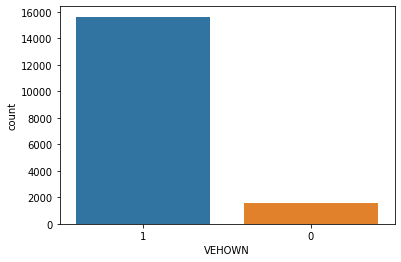

In [3]:
# check proportion
#define function 
import seaborn as sns
def cat_col_prop(data, col):
    print(pd.concat([data[col].value_counts(),
          data[col].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage')))

    sns.countplot(data[col], order =  data[col].value_counts().index)

#define function 
cat_col_prop(variables, 'VEHOWN')

In [4]:
prep = variables.drop(columns = ['Unnamed: 0','HHFAMINC','WALK','TAXI','BIKE2SAVE','PTRANS','BUS','TRAIN','WALK2SAVE','HHRELATD','LIF_CYC','URBAN','URBANSIZE','HIGH_EDUC','HOMEOWN','WRKCOUNT_ratio','HHSIZE_cleaned','FT_ratio','WEBUSE17','PRICE','AVG_WORK_DIST','one_job','flexible_work'])
households = pd.read_csv('/Users/weijilim/Downloads/csv/hhpub.csv')
NY_households = households[households['HHSTATE'] == 'NY']
prep

,HOUSEID,VEHOWN,CNTTDHH,DRVRCNTPROP_binned,HHFAMINC_1.0,HHFAMINC_2.0,HHFAMINC_3.0,HHFAMINC_4.0,HHFAMINC_5.0,HHFAMINC_6.0,HHFAMINC_7.0,HHFAMINC_8.0,HHFAMINC_9.0,HHFAMINC_10.0,HHFAMINC_11.0,HHFAMINC_NA,WALK_1.0,WALK_2.0,WALK_3.0,WALK_4.0,WALK_5.0,WALK_NA,TAXI_1,TAXI_2,TAXI_3,TAXI_4,TAXI_5,TAXI_NA,BUS_1,BUS_2,BUS_3,BUS_4,BUS_5,BUS_NA,TRAIN_1,TRAIN_2,TRAIN_3,TRAIN_4,TRAIN_5,TRAIN_NA,PRICE_1.0,PRICE_2.0,PRICE_3.0,PRICE_4.0,PRICE_5.0,PRICE_NA,WALK2SAVE_1.0,WALK2SAVE_2.0,WALK2SAVE_3.0,WALK2SAVE_4.0,WALK2SAVE_5.0,WALK2SAVE_NA,BIKE2SAVE_1.0,BIKE2SAVE_2.0,BIKE2SAVE_3.0,BIKE2SAVE_4.0,BIKE2SAVE_5.0,BIKE2SAVE_NA,PTRANS_1.0,PTRANS_2.0,PTRANS_3.0,PTRANS_4.0,PTRANS_5.0,PTRANS_NA,HIGH_EDUC_1.0,HIGH_EDUC_2.0,HIGH_EDUC_3.0,HIGH_EDUC_4.0,HIGH_EDUC_5.0,HIGH_EDUC_NA,HOMEOWN_HOME_OWN,HOMEOWN_HOME_RENT,HOMEOWN_NA,WEBUSE17_Daily,WEBUSE17_NA,WEBUSE17_Never,WEBUSE17_Rarely,WRKCOUNT_ratio_0,WRKCOUNT_ratio_1,WRKCOUNT_ratio_<0.5,WRKCOUNT_ratio_>0.5,HHSIZE_cleaned_1,HHSIZE_cleaned_2,HHSIZE_cleaned_>2,FT_ratio_0,FT_ratio_0.5,FT_ratio_1,FT_ratio_<0.5,FT_ratio_>0.5,FT_ratio_NA,FT_ratio_non-work,AVG_WORK_DIST_10 - 15 miles,AVG_WORK_DIST_5-10 miles,AVG_WORK_DIST_<=5 miles,AVG_WORK_DIST_>15 miles,AVG_WORK_DIST_Not Sure,one_job_0,one_job_0.5,one_job_1,one_job_<0.5,one_job_>0.5,one_job_non-work,flexible_work_0,flexible_work_0.5,flexible_work_1,flexible_work_<0.5,flexible_work_NA,flexible_work_non-work,DRVRCNTPROP_binned_0,DRVRCNTPROP_binned_0.5,DRVRCNTPROP_binned_1,DRVRCNTPROP_binned_<0.5,DRVRCNTPROP_binned_>0.5,URBANSIZE_1,URBANSIZE_2,URBANSIZE_3,URBANSIZE_5,URBANSIZE_6,URBAN_1,URBAN_2,URBAN_3,URBAN_4,LIF_CYC_1,LIF_CYC_2,LIF_CYC_3,LIF_CYC_4,LIF_CYC_5,LIF_CYC_6,LIF_CYC_7,LIF_CYC_8,LIF_CYC_9,LIF_CYC_10,HHRELATD_1,HHRELATD_2
0,30000012,1,9,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,30000082,1,12,0.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,30000130,1,4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,30000380,1,18,>0.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,30000434,1,6,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17173,40793685,1,5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
17174,40793808,1,16,>0.5,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,

In [5]:
hhsize = NY_households[['HOUSEID','HHSIZE']].copy()

In [6]:
hhtrip = prep[['HOUSEID','CNTTDHH']].copy()
hh_trip = hhtrip.merge(hhsize, on = 'HOUSEID', how = 'left')

In [7]:
hh_trip['avg_trip'] = hh_trip['CNTTDHH']/hh_trip['HHSIZE']

In [8]:
## pd.qcut(hh_trip['avg_trip'],3)

           counts  percentage
2.000000     2221   12.929328
3.000000     1853   10.787053
0.000000     1744   10.152521
4.000000     1738   10.117592
5.000000     1312    7.637676
...           ...         ...
23.000000       1    0.005821
14.500000       1    0.005821
3.285714        1    0.005821
5.375000        1    0.005821
1.625000        1    0.005821

[156 rows x 2 columns]


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


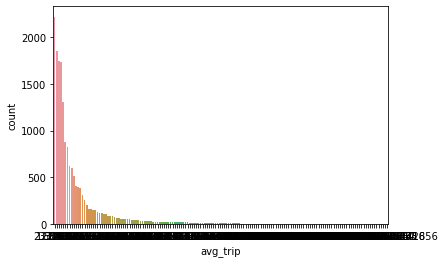

In [9]:
cat_col_prop(hh_trip, 'avg_trip')

             counts  percentage
2 - 5 trips    7691   44.772383
<=2 trips      5961   34.701362
> 5 trips      3526   20.526255


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


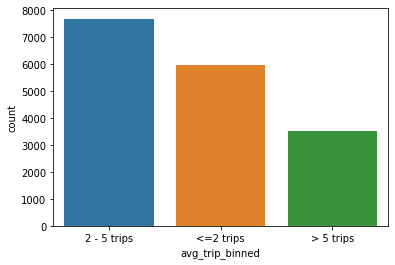

In [10]:
bins = [0, 2, 5, 100]
bins_label = ['<=2 trips','2 - 5 trips','> 5 trips']
hh_trip['avg_trip_binned'] = pd.cut(hh_trip['avg_trip'], bins, labels = bins_label,include_lowest=True)


cat_col_prop(hh_trip,'avg_trip_binned')

In [11]:
hh_trip_final = hh_trip[['HOUSEID','avg_trip_binned','avg_trip']]

In [12]:
prep = prep.merge(hh_trip_final, on ='HOUSEID', how = 'left')

In [13]:
df_one_hot = pd.get_dummies(prep['avg_trip_binned'])

In [14]:
prep_final = pd.concat([prep, df_one_hot], axis = 1)
prep_final = prep_final.drop(columns =['avg_trip_binned','CNTTDHH','DRVRCNTPROP_binned','avg_trip'])
prep_final

,HOUSEID,VEHOWN,HHFAMINC_1.0,HHFAMINC_2.0,HHFAMINC_3.0,HHFAMINC_4.0,HHFAMINC_5.0,HHFAMINC_6.0,HHFAMINC_7.0,HHFAMINC_8.0,HHFAMINC_9.0,HHFAMINC_10.0,HHFAMINC_11.0,HHFAMINC_NA,WALK_1.0,WALK_2.0,WALK_3.0,WALK_4.0,WALK_5.0,WALK_NA,TAXI_1,TAXI_2,TAXI_3,TAXI_4,TAXI_5,TAXI_NA,BUS_1,BUS_2,BUS_3,BUS_4,BUS_5,BUS_NA,TRAIN_1,TRAIN_2,TRAIN_3,TRAIN_4,TRAIN_5,TRAIN_NA,PRICE_1.0,PRICE_2.0,PRICE_3.0,PRICE_4.0,PRICE_5.0,PRICE_NA,WALK2SAVE_1.0,WALK2SAVE_2.0,WALK2SAVE_3.0,WALK2SAVE_4.0,WALK2SAVE_5.0,WALK2SAVE_NA,BIKE2SAVE_1.0,BIKE2SAVE_2.0,BIKE2SAVE_3.0,BIKE2SAVE_4.0,BIKE2SAVE_5.0,BIKE2SAVE_NA,PTRANS_1.0,PTRANS_2.0,PTRANS_3.0,PTRANS_4.0,PTRANS_5.0,PTRANS_NA,HIGH_EDUC_1.0,HIGH_EDUC_2.0,HIGH_EDUC_3.0,HIGH_EDUC_4.0,HIGH_EDUC_5.0,HIGH_EDUC_NA,HOMEOWN_HOME_OWN,HOMEOWN_HOME_RENT,HOMEOWN_NA,WEBUSE17_Daily,WEBUSE17_NA,WEBUSE17_Never,WEBUSE17_Rarely,WRKCOUNT_ratio_0,WRKCOUNT_ratio_1,WRKCOUNT_ratio_<0.5,WRKCOUNT_ratio_>0.5,HHSIZE_cleaned_1,HHSIZE_cleaned_2,HHSIZE_cleaned_>2,FT_ratio_0,FT_ratio_0.5,FT_ratio_1,FT_ratio_<0.5,FT_ratio_>0.5,FT_ratio_NA,FT_ratio_non-work,AVG_WORK_DIST_10 - 15 miles,AVG_WORK_DIST_5-10 miles,AVG_WORK_DIST_<=5 miles,AVG_WORK_DIST_>15 miles,AVG_WORK_DIST_Not Sure,one_job_0,one_job_0.5,one_job_1,one_job_<0.5,one_job_>0.5,one_job_non-work,flexible_work_0,flexible_work_0.5,flexible_work_1,flexible_work_<0.5,flexible_work_NA,flexible_work_non-work,DRVRCNTPROP_binned_0,DRVRCNTPROP_binned_0.5,DRVRCNTPROP_binned_1,DRVRCNTPROP_binned_<0.5,DRVRCNTPROP_binned_>0.5,URBANSIZE_1,URBANSIZE_2,URBANSIZE_3,URBANSIZE_5,URBANSIZE_6,URBAN_1,URBAN_2,URBAN_3,URBAN_4,LIF_CYC_1,LIF_CYC_2,LIF_CYC_3,LIF_CYC_4,LIF_CYC_5,LIF_CYC_6,LIF_CYC_7,LIF_CYC_8,LIF_CYC_9,LIF_CYC_10,HHRELATD_1,HHRELATD_2,<=2 trips,2 - 5 trips,> 5 trips
0,30000012,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,30000082,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,30000130,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,30000380,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
4,30000434,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17173,40793685,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
17174,40793808,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

## Model Implementation

In [68]:

# shuffle the data 
prep_final = prep_final.reindex(np.random.permutation(prep_final.index)) 

# training variables
x = prep_final.drop(columns = ['HOUSEID','VEHOWN'])


#
# test variables 
y = np.array(prep_final[['VEHOWN']]).astype(int)

y = y.reshape(y.shape[0],)
y.shape
x.shape

(17178,)

In [16]:
# split into train and test set
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=2021)

In [17]:
y_test.shape

(3436,)

In [19]:
# initial model without doing sampling
estimator = linear_model.LogisticRegression(max_iter = 300)
estimator.fit(x_train, y_train)

LogisticRegression(max_iter=300)

In [38]:
# use the metrics to see - accuracy, recall, precision and F1 score
y_pred = estimator.predict(x_test)
print('Accuracy Score: ',round(metrics.accuracy_score(y_test, y_pred),5))
print('F1 Score:',round(metrics.recall_score(y_test, y_pred),5))
print('Recall:',round(metrics.f1_score(y_test, y_pred),5))
print('Precision:',round(metrics.precision_score(y_test, y_pred),5))
print('AUC',round(metrics.roc_auc_score(y_test, y_pred),5))
print('JQ precision - to check', round(metrics.precision_score(1-y_test, 1-y_pred),5))
print('JQ recall - to check', round(metrics.recall_score(1-y_test, 1-y_pred),5))

Accuracy Score:  0.97177
F1 Score: 0.98854
Recall: 0.98462
Precision: 0.98073
AUC 0.89123
JQ precision - to check 0.86716
JQ recall - to check 0.79392


In [21]:
print(metrics.confusion_matrix(y_test, y_pred))

sm_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, y_pred)}
Accuracy: {round(metrics.accuracy_score(y_test, y_pred), 3)}
"""
print(sm_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, y_pred)))

print('All the scores are very high because it is correctly predicting 1, which is quite a big proportion')

[[ 235   61]
 [  36 3104]]

The evaluation report is:
Confusion Matrix:
[[ 235   61]
 [  36 3104]]
Accuracy: 0.972

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83       296
           1       0.98      0.99      0.98      3140

    accuracy                           0.97      3436
   macro avg       0.92      0.89      0.91      3436
weighted avg       0.97      0.97      0.97      3436

All the scores are very high because it is correctly predicting 1, which is quite a big proportion


In [23]:
# Decision Tree
dt_estimator = tree.DecisionTreeClassifier()
dt_estimator.fit(x_train, y_train)

DecisionTreeClassifier()

In [25]:
# Confusion Matrix for DT
y_predict = dt_estimator.predict(x_train)
report = f"""Training set
The evaluation report of fully grown tree is:
Confusion Matrix:
{metrics.confusion_matrix(y_train, y_predict)}
Accuracy: {round(metrics.accuracy_score(y_train, y_predict), 3)}
"""
print(report)

y_predict = dt_estimator.predict(x_test)
report = f"""Test set
The evaluation report of fully grown tree is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, y_predict)}
Accuracy: {round(metrics.accuracy_score(y_test, y_predict), 3)}
"""
print(report)

Training set
The evaluation report of fully grown tree is:
Confusion Matrix:
[[ 1246     0]
 [    0 12496]]
Accuracy: 1.0

Test set
The evaluation report of fully grown tree is:
Confusion Matrix:
[[ 227   69]
 [  79 3061]]
Accuracy: 0.957



In [37]:
# Metrics for DT 
print('Accuracy Score: ',round(metrics.accuracy_score(y_test, y_predict),5))
print('F1 Score:',round(metrics.recall_score(y_test, y_predict),5))
print('Recall:',round(metrics.f1_score(y_test, y_predict),5))
print('Precision:',round(metrics.precision_score(y_test, y_predict),5))
print('AUC',round(metrics.roc_auc_score(y_test, y_predict),5))
print('JQ precision - to check', round(metrics.precision_score(1-y_test, 1-y_predict),5))
print('JQ recall - to check', round(metrics.recall_score(1-y_test, 1-y_predict),5))

Accuracy Score:  0.95693
F1 Score: 0.97484
Recall: 0.9764
Precision: 0.97796
AUC 0.87087
JQ precision - to check 0.74183
JQ recall - to check 0.76689


In [ ]:
# visualise the tree
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
x_columns = x.columns.to_list()

In [ ]:
dot_data = export_graphviz(
        dt_estimator,
        out_file=None,
        feature_names=x_columns,
        class_names = ['non-car','car'],
        rounded=True,
        filled=True
    )

In [ ]:
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
graph.render("initial_tree")

## Oversampling using imblearn

In [ ]:
pip install imblearn

In [39]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
# apply only to train set
# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

lr_smote = linear_model.LogisticRegression(max_iter = 300)
lr_smote.fit(x_train_SMOTE, y_train_SMOTE)

y_pred_smote = lr_smote.predict(x_test)
print('Accuracy Score: ',round(metrics.accuracy_score(y_test, y_pred_smote),5))
print('F1 Score:',round(metrics.recall_score(y_test, y_pred_smote),5))
print('Recall:',round(metrics.f1_score(y_test, y_pred_smote),5))
print('Precision:',round(metrics.precision_score(y_test, y_pred_smote),5))
print('AUC',round(metrics.roc_auc_score(y_test, y_pred_smote),5))
print('JQ precision - to check', round(metrics.precision_score(1-y_test, 1-y_pred_smote),5))
print('JQ recall - to check', round(metrics.recall_score(1-y_test, 1-y_pred_smote),5))

Before oversampling:  Counter({1: 12496, 0: 1246})
After oversampling:  Counter({1: 12496, 0: 12496})
Accuracy Score:  0.97322
F1 Score: 0.98822
Recall: 0.98539
Precision: 0.98258
AUC 0.9012
JQ precision - to check 0.86691
JQ recall - to check 0.81419


In [56]:
sm_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, y_pred_smote)}
Accuracy: {round(metrics.accuracy_score(y_test, y_pred_smote), 3)}
"""
print(sm_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, y_pred_smote)))




The evaluation report is:
Confusion Matrix:
[[ 241   55]
 [  37 3103]]
Accuracy: 0.973

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       296
           1       0.98      0.99      0.99      3140

    accuracy                           0.97      3436
   macro avg       0.92      0.90      0.91      3436
weighted avg       0.97      0.97      0.97      3436



In [57]:
# combining oversampling and undersampling..? yet to get the confusion matrix out
import numpy as np
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from numpy import mean

over_values = [0.3,0.4,0.5]
under_values = [0.7,0.6,0.5]
for o in over_values:
  for u in under_values:
    # define pipeline
    model = SVC()
    over = SMOTE(sampling_strategy=o)
    under = RandomUnderSampler(sampling_strategy=u)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    scores = cross_val_score(pipeline, x, y, scoring='recall', cv=5, n_jobs=-1)
    score = mean(scores)
    print('SMOTE oversampling rate:%.1f, Random undersampling rate:%.1f , Mean recall: %.3f' % (o, u, score))


SMOTE oversampling rate:0.3, Random undersampling rate:0.7 , Mean recall: 0.981
SMOTE oversampling rate:0.3, Random undersampling rate:0.6 , Mean recall: 0.983
SMOTE oversampling rate:0.3, Random undersampling rate:0.5 , Mean recall: 0.986
SMOTE oversampling rate:0.4, Random undersampling rate:0.7 , Mean recall: 0.985
SMOTE oversampling rate:0.4, Random undersampling rate:0.6 , Mean recall: 0.987
SMOTE oversampling rate:0.4, Random undersampling rate:0.5 , Mean recall: 0.989
SMOTE oversampling rate:0.5, Random undersampling rate:0.7 , Mean recall: 0.988
SMOTE oversampling rate:0.5, Random undersampling rate:0.6 , Mean recall: 0.990
SMOTE oversampling rate:0.5, Random undersampling rate:0.5 , Mean recall: 0.991


## Random Forest

In [43]:
# Random Forest Model
rf_car = ensemble.RandomForestClassifier(max_depth = 20, random_state = 2021, min_samples_split = 10, min_samples_leaf = 3, n_estimators = 100,class_weight='balanced')
rf_car.fit(x_train, y_train)
y_rf_pred = rf_car.predict(x_test)
print('Accuracy Score: ',round(metrics.accuracy_score(y_test, y_rf_pred),5))
print('F1 Score:',round(metrics.recall_score(y_test, y_rf_pred),5))
print('Recall:',round(metrics.f1_score(y_test, y_rf_pred),5))
print('Precision:',round(metrics.precision_score(y_test, y_rf_pred),5))
print('AUC',round(metrics.roc_auc_score(y_test, y_rf_pred),5))
print('JQ precision - to check', round(metrics.precision_score(1-y_test, 1-y_rf_pred),5))
print('JQ recall - to check', round(metrics.recall_score(1-y_test, 1-y_rf_pred),5))

Accuracy Score:  0.97148
F1 Score: 0.97834
Recall: 0.9843
Precision: 0.99033
AUC 0.9385
JQ precision - to check 0.79641
JQ recall - to check 0.89865


In [44]:
print(metrics.confusion_matrix(y_test, y_rf_pred))

sm_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, y_rf_pred)}
Accuracy: {round(metrics.accuracy_score(y_test, y_rf_pred), 3)}
"""
print(sm_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, y_rf_pred)))

[[ 266   30]
 [  68 3072]]

The evaluation report is:
Confusion Matrix:
[[ 266   30]
 [  68 3072]]
Accuracy: 0.971

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.80      0.90      0.84       296
           1       0.99      0.98      0.98      3140

    accuracy                           0.97      3436
   macro avg       0.89      0.94      0.91      3436
weighted avg       0.97      0.97      0.97      3436



In [45]:
# Feature Importance for Random Forest
x = rf_car.feature_importances_
x_idx = np.where(x != 0)[0]
rf_features = pd.DataFrame(x_train.columns[x_idx], columns = ['Car Variables'])
x_values = pd.DataFrame(rf_car.feature_importances_[x_idx], columns = ['Feature Importance'])
car_importance = pd.concat([rf_features.reset_index(drop=True), x_values], axis=1)
car_importance.nlargest(10,['Feature Importance'])

,Car Variables,Feature Importance
101,DRVRCNTPROP_binned_0,0.154465
66,HOMEOWN_HOME_RENT,0.092328
103,DRVRCNTPROP_binned_1,0.083299
65,HOMEOWN_HOME_OWN,0.081580
28,BUS_5,0.047865
12,WALK_1.0,0.042835
124,HHRELATD_1,0.027355
76,HHSIZE_cleaned_1,0.024398
22,TAXI_5,0.023924
54,PTRANS_1.0,0.022090


In [65]:
# Random Forest Model with tuning
rf_car = ensemble.RandomForestClassifier(max_depth = 5, max_features = 'auto',random_state = 2021, min_samples_split = 10, min_samples_leaf = 11, n_estimators = 50,class_weight='balanced')
rf_car.fit(x_train, y_train)
y_rf_pred = rf_car.predict(x_test)
print('Accuracy Score: ',round(metrics.accuracy_score(y_test, y_rf_pred),5))
print('F1 Score:',round(metrics.recall_score(y_test, y_rf_pred),5))
print('Recall:',round(metrics.f1_score(y_test, y_rf_pred),5))
print('Precision:',round(metrics.precision_score(y_test, y_rf_pred),5))
print('AUC',round(metrics.roc_auc_score(y_test, y_rf_pred),5))
print('JQ precision - to check', round(metrics.precision_score(1-y_test, 1-y_rf_pred),5))
print('JQ recall - to check', round(metrics.recall_score(1-y_test, 1-y_rf_pred),5))

Accuracy Score:  0.93976
F1 Score: 0.93981
Recall: 0.96612
Precision: 0.99394
AUC 0.9395
JQ precision - to check 0.59529
JQ recall - to check 0.93919


In [66]:
print(metrics.confusion_matrix(y_test, y_rf_pred))

sm_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, y_rf_pred)}
Accuracy: {round(metrics.accuracy_score(y_test, y_rf_pred), 3)}
"""
print(sm_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, y_rf_pred)))

[[ 278   18]
 [ 189 2951]]

The evaluation report is:
Confusion Matrix:
[[ 278   18]
 [ 189 2951]]
Accuracy: 0.94

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.60      0.94      0.73       296
           1       0.99      0.94      0.97      3140

    accuracy                           0.94      3436
   macro avg       0.79      0.94      0.85      3436
weighted avg       0.96      0.94      0.95      3436



In [62]:
# Tuning of RF Model

# Hyperparameter Tuning for Random Forest
# best parameters n_estimator: > 60, max_feature = 'auto', max_depth = 20, min_sample_split = 10, min_sample_leaf = 3
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators': [10,20,30,40,50,60],
              'max_features': ['auto', 'sqrt'],
              'max_depth': np.arange(5, 36, 5),
              'min_samples_split': [5, 10, 20, 40],
              'min_samples_leaf': [3, 5, 11, 25],
             }
rf_tune = RandomizedSearchCV(RandomForestClassifier(), param_distributions = parameters, n_iter = 100, verbose = 2, scoring = 'recall', n_jobs = -1)
rf_tune.fit(x_train, y_train)
print('best score:', rf_tune.best_score_)
print('best parameters: ', rf_tune.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
best score: 0.9991197118847539
best parameters:  {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 11, 'max_features': 'auto', 'max_depth': 5}


In [67]:
# Feature Importance for Random Forest Tuned
x = rf_car.feature_importances_
x_idx = np.where(x != 0)[0]
rf_features = pd.DataFrame(x_train.columns[x_idx], columns = ['Car Variables'])
x_values = pd.DataFrame(rf_car.feature_importances_[x_idx], columns = ['Feature Importance'])
car_importance = pd.concat([rf_features.reset_index(drop=True), x_values], axis=1)
car_importance.nlargest(10,['Feature Importance'])

,Car Variables,Feature Importance
93,DRVRCNTPROP_binned_0,0.156548
62,HOMEOWN_HOME_RENT,0.136187
95,DRVRCNTPROP_binned_1,0.116904
25,BUS_5,0.066466
61,HOMEOWN_HOME_OWN,0.058842
10,WALK_1.0,0.049842
70,HHSIZE_cleaned_1,0.039418
115,HHRELATD_1,0.033026
0,HHFAMINC_1.0,0.029421
17,TAXI_3,0.024694
